In [1]:
import numpy as np
import odes

Name: Jacob Anabi, Gage Kizzar

Student ID: 2294644,2291700

Email: anabi@chapman.edu, kizzar@chapman.edu

Course: PHYS220/MATH220/CPSC220 Fall 2018

Assignment: CW11

# Abstract

In this paper we will be comparing a variety of methods to solve differential equations. The four methods that we will use are: Euler's Method, Heun's Method, and the 2nd and 4th order Runge-Kutta Methods. All of the methods have different strengths and weaknesses, and we hope to compare these in this paper.

# Introduction

Rememember from CW10 that there are many analytical methods to solve an ordinary differential equation (ODE). These methods include:

Euler's Method, Heun's (Trapezoid) Method, 2nd-order Runge-Kutta Method, and 4th-order Runge-Kutta Method.

# Coupled ODE Example

Let's consider the coupled set of ODEs with initial conditions $x(0) = 1$, $v(0) = 0$:

   $$x'(t) = v(t)$$
   $$v'(t) = -x(t)$$

If $x(t) = \cos(t)$, then $v(t) = x'(t) = -\sin(t)$

So, $v'(t) = -\cos(t) = -x(t)$

Thus, $x(t) = \cos(t)$ and $v(t) = -\sin(t)$ satisfies these equations. This solution can represent some sort of oscillation of a physical system.

# Methods

To solve the following equation with the aformentioned methods, we will state:
$$\vec{r}'(t) = \hat{J}\vec{r}$$
where $\vec{r}(t) = [x(t), v(t)]$ is a column vector with initial condition $\vec{r}(0) = [1,0]$, such that the coordinates are coupled by an antisymmetric matrix (meaning its transpose equals its negative):
$$\hat{J} = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$$
This solution should be $\vec{r}(t) = \exp(t\hat{J})\vec{r}(0)$.

NOTE: $\exp(t\hat{J}) = \hat{I}\sum_{n=0}^\infty t^{2n}(-1)^n/(2n)! + \hat{J}\sum_{n=1}^\infty t^{2n-1}(-1)^{n-1}/(2n-1)! = \hat{I}\cos(t) + \hat{J}\sin(t)$

We will solve this differential equation from $t=0$ until $t= 5(2\pi)$ using $N$ time steps per period (so $\Delta t = 2\pi / N$).

## Euler's Method

For refamilirization, Euler's Method, which is accurate to 1st-order, is defined as:
$$u_{k+1} = u_k + \Delta t\, f[t_k, u_k]$$
where $f[t, u(t)]$ is the slope of $u(t)$ at some domain point $t$.

For clarity sake, we will rewrite this in terms of vectors:
$$\vec{r}(t_{k+1}) = \vec{r}(t_k) + \Delta t\, \vec{r}'(t_k)$$
Subsituting $\Delta t = 2\pi / N$, we get:
$$\vec{r}(t_{k+1}) = \vec{r}(t_k) + 2\pi / N\, \vec{r}'(t_k)$$
Substituting $$\vec{r}'(t) = \hat{J}\vec{r}$$ we get:
$$\vec{r}(t_{k+1}) = \vec{r}(t_k) + 2\pi / N\, \hat{J}\vec{r}(t_k)$$
To test Euler's method, we will plot the r(t) function user Euler's method, and the actual function definition defined above. We will be testing with 3 different $N$-values.

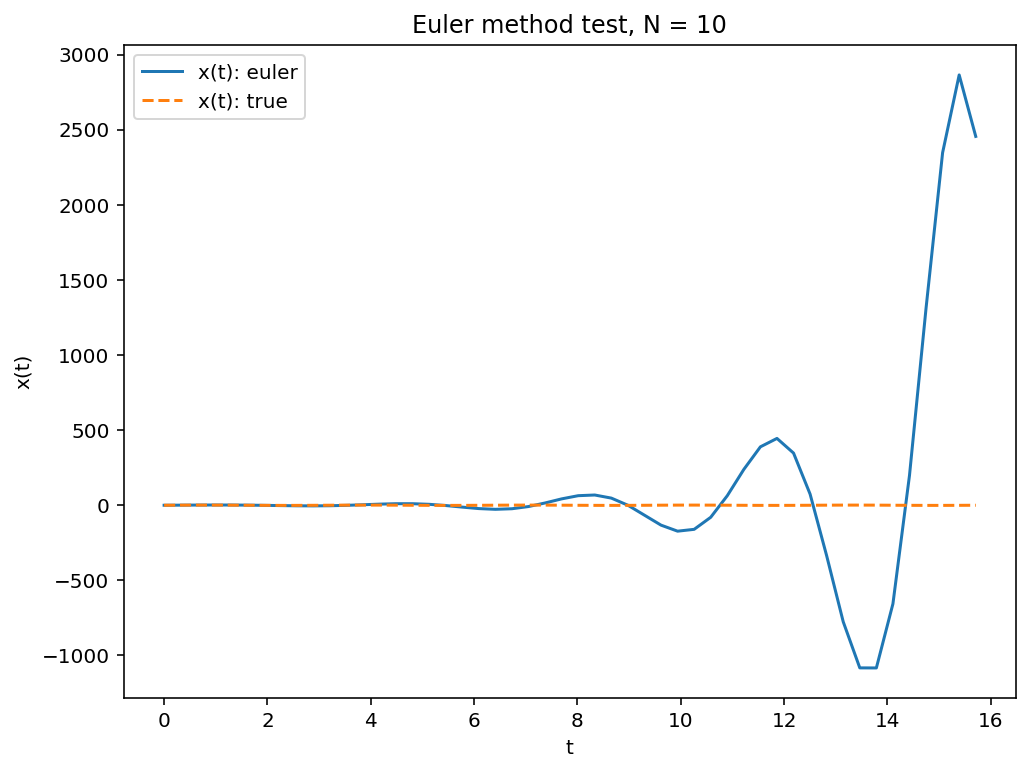

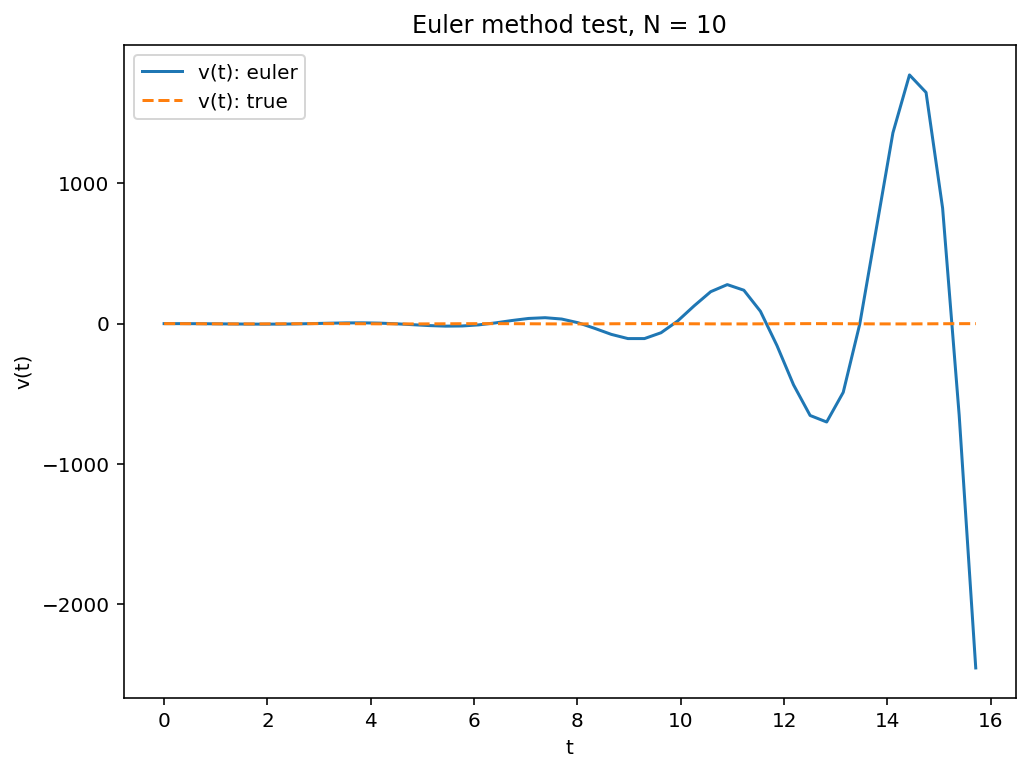

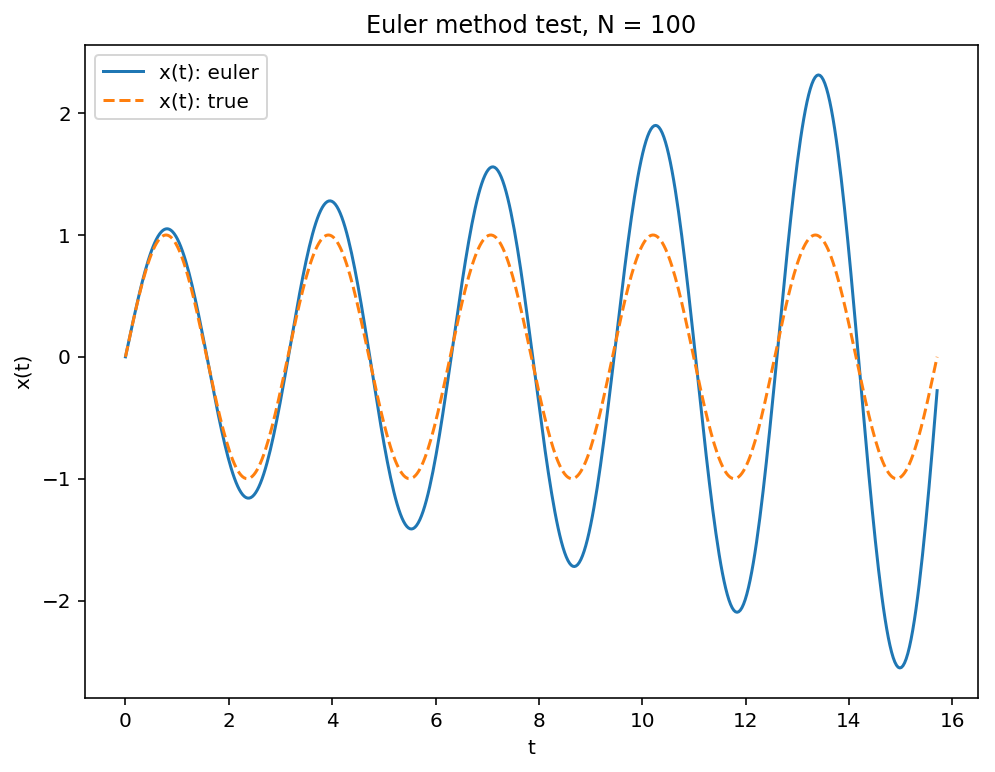

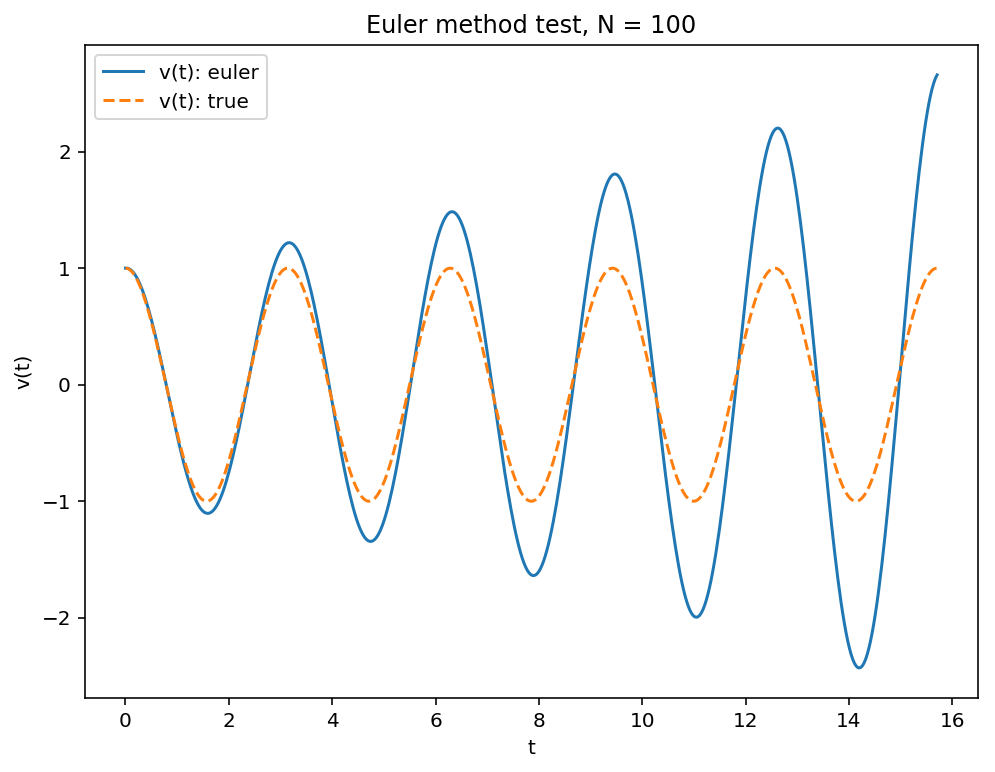

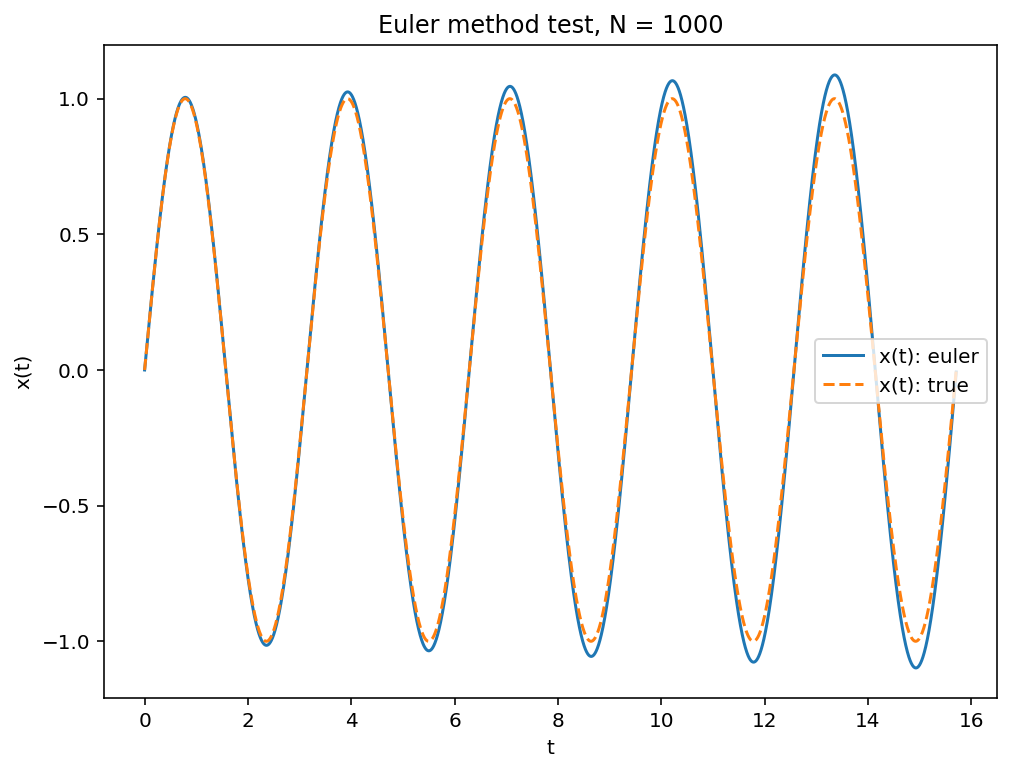

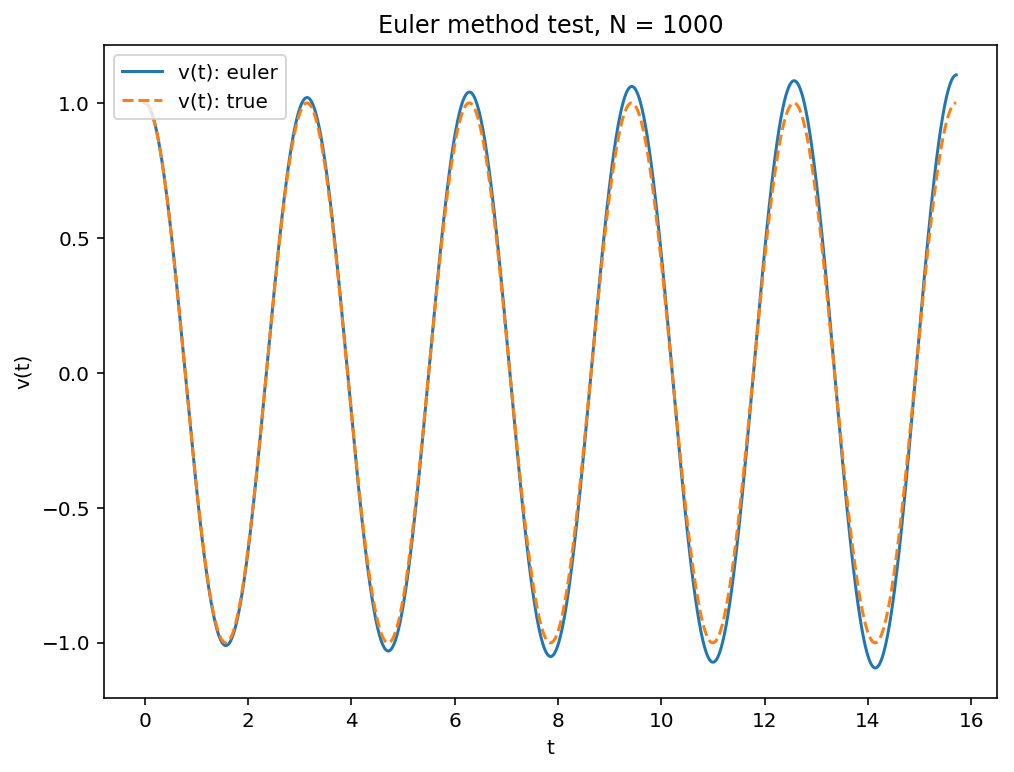

In [4]:
N = np.array([10, 100, 1000]) # three different N-values

for n in N:
    t = np.linspace(0, 5*np.pi, 5*n, endpoint=True) # domain t

    r_euler = odes.euler_method(np.array([0,1]), n) # r(t) using euler's method
    x_euler = np.array([i[0] for i in r_euler]) # retrieving each position from r(t)
    v_euler = np.array([i[1] for i in r_euler]) # retrieving each velocity from r(t)

    r_true = odes.gen_method(np.array([0,1]), n) # actual r(t)
    x_true = np.array([i[0] for i in r_true]) # retrieving actual x(t)
    v_true = np.array([i[1] for i in r_true]) # retrieving actual v(t)

    # title
    title = "Euler method test, N = "
    title += str(n)

    # legend labels
    xt_labels = np.array(["x(t): euler", "x(t): true"])
    vt_labels = np.array(["v(t): euler", "v(t): true"])

    odes.gen_plot(t, np.array([x_euler, x_true]), labels=xt_labels, linestyles=np.array(["-", "--"]), xlabel="t", ylabel="x(t)", title=title) # plotting x(t)'s
    odes.gen_plot(t, np.array([v_euler, v_true]), labels=vt_labels, linestyles=np.array(["-", "--"]), xlabel="t", ylabel="v(t)", title=title) # plotting v(t)'s

As we can see, Euler's method is not very accurate at smaller $N$-values, and it seems to diverge at these smaller $N$-values, but as we increase the $N$-values, Euler's method begins the resemble the actual function $r(t)$, which is defined above. This inaccuracy is due to Euler's method only using a forward derivative and its assumption of a constant slope.

## Heun's (Trapezoidal) Method

The functions that we use to analyze a function using Heun's method is defined as:
$$y'(t)=f(t,y(t)), y(0)=y_0$$
$$y^{intermeditate}_{i+1}=y_i+\Delta tf(t_i,y_i)$$
$$y_{i+1}=y_i+(\Delta t/2)[f(t_i,y_i)+f(t_{i+1},y^{intermediate}_{i+1})]$$
If we substitute relevant information from the example, we will get:
$$\vec{r}'(t) = \hat{J}\vec{r}, \vec{r}(0)=[0,1]$$
$$\vec{r}^{intermeditate}_{i+1}=\vec{r}_i+\Delta t\hat{J}\vec{r}_i$$
$$\vec{r}_{i+1}=\vec{r}_i+(\Delta t/2)[\hat{J}\vec{r}_i+\hat{J}\vec{r}^{intermeditate}_{i+1}]$$

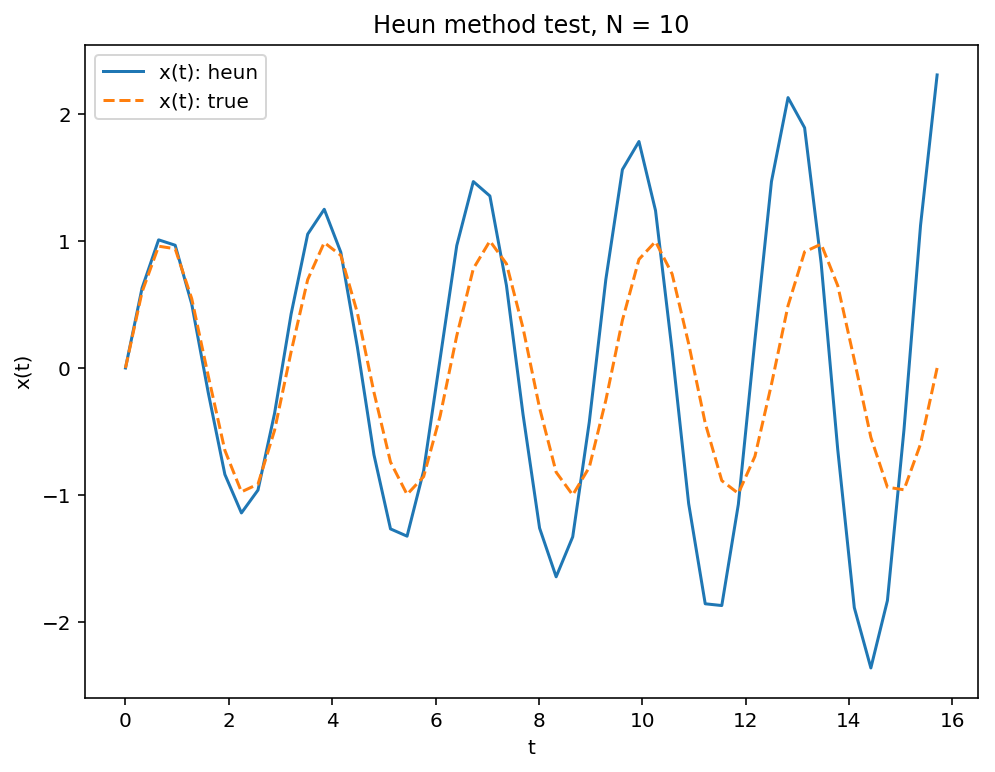

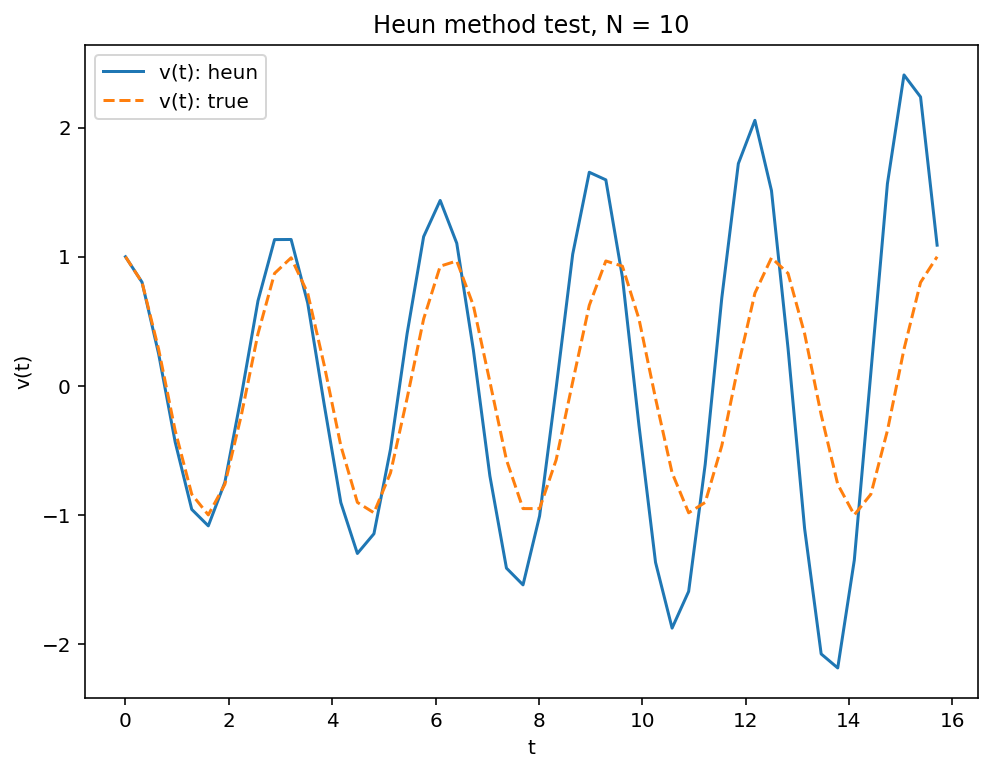

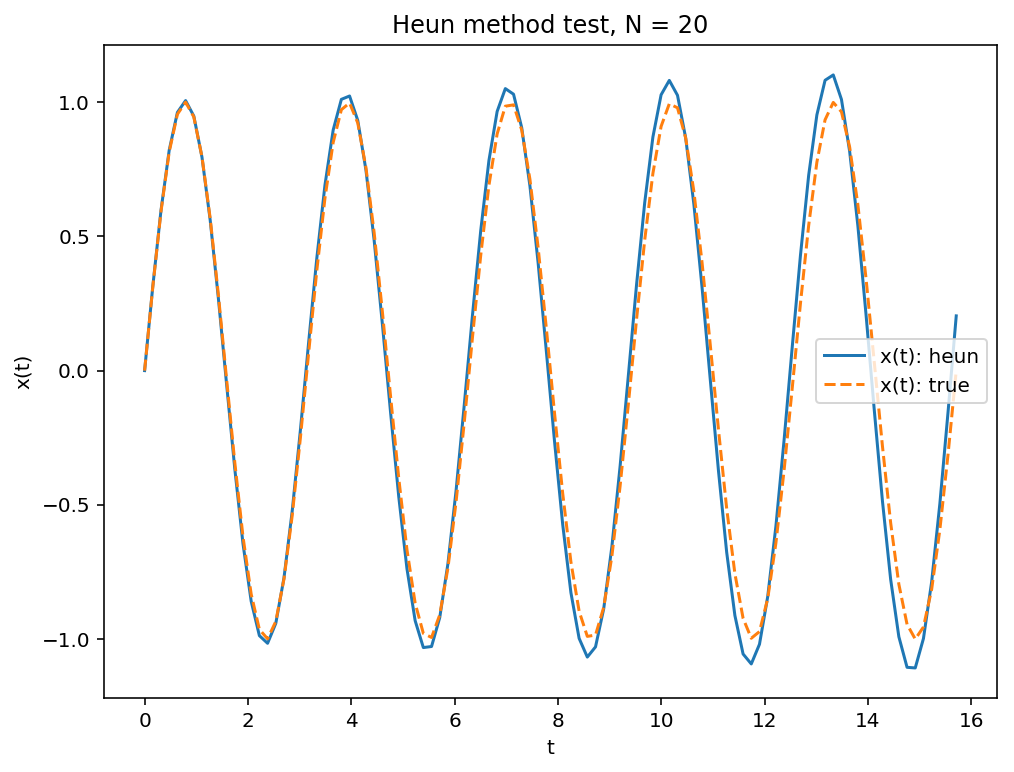

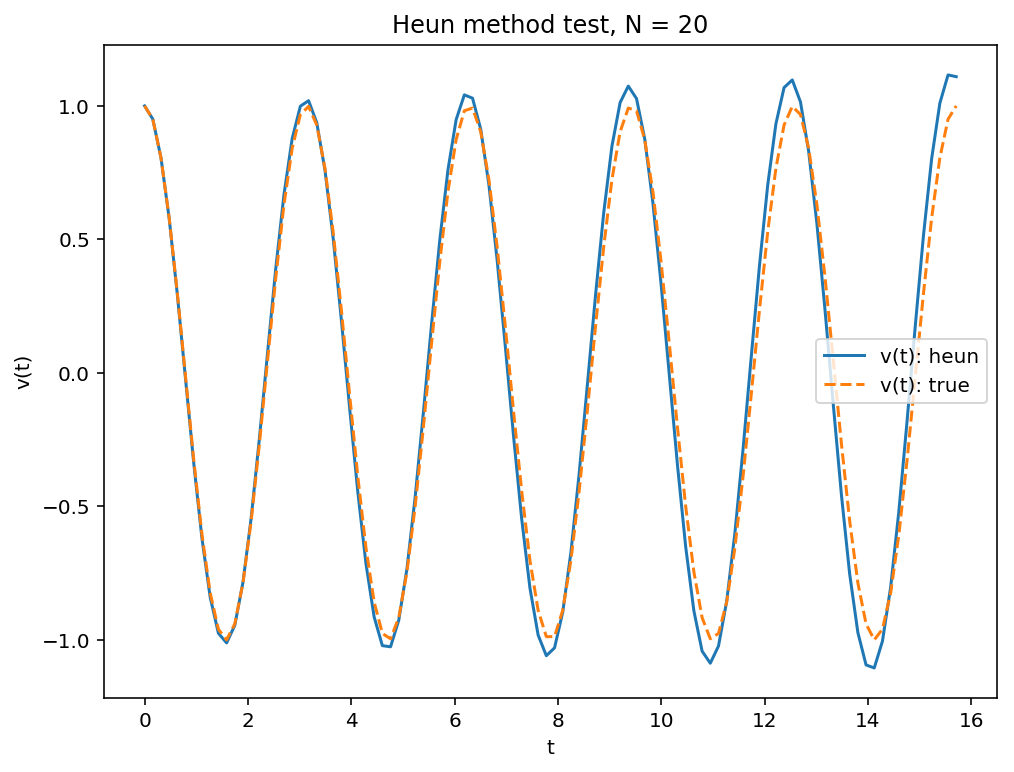

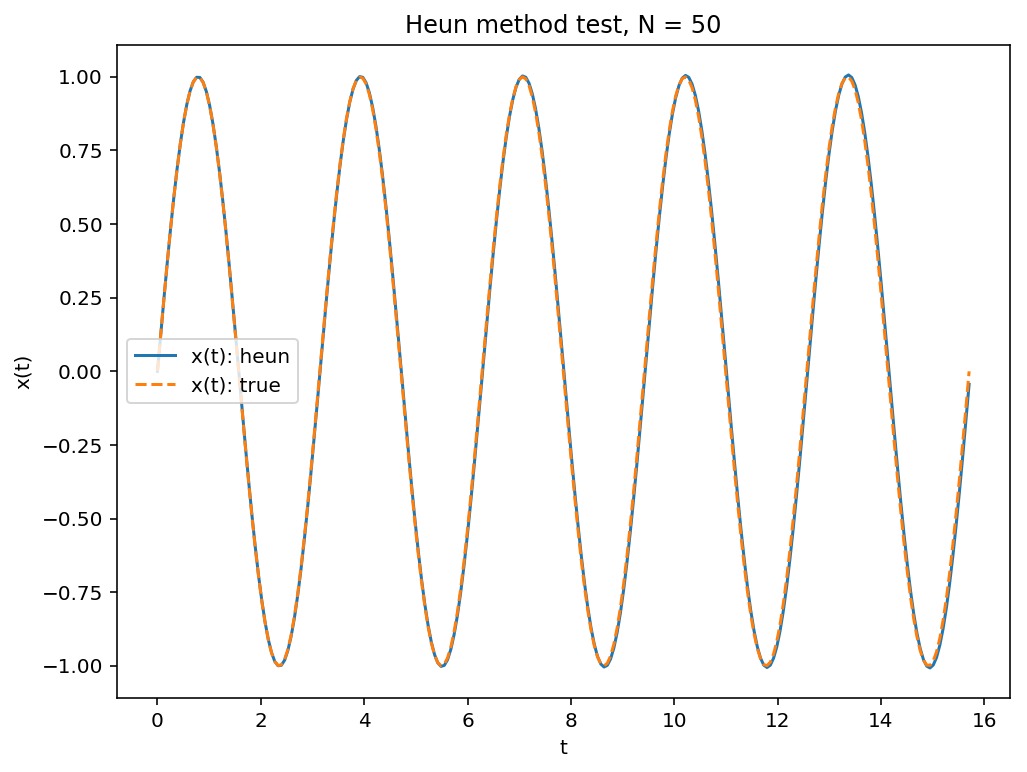

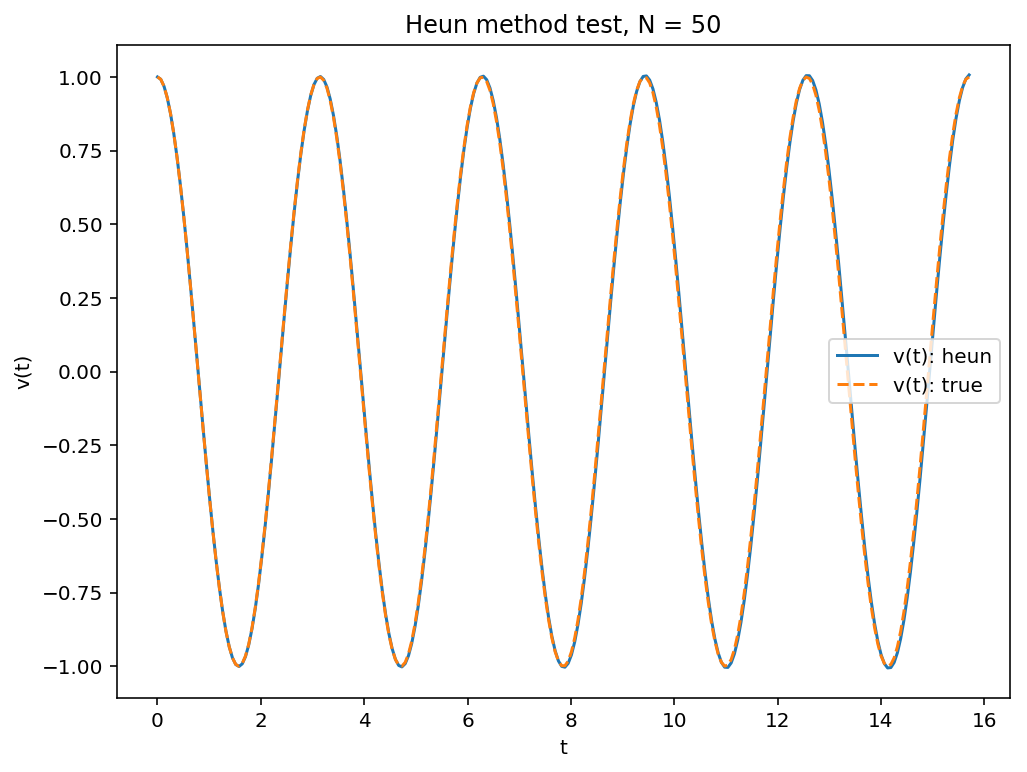

In [6]:
N = np.array([10, 20, 50]) # three different N-values

for n in N:
    t = np.linspace(0, 5*np.pi, 5*n, endpoint=True) # domain t

    r_heun = odes.heun_method(np.array([0,1]), n) # r(t) using euler's method
    x_heun = np.array([i[0] for i in r_heun]) # retrieving each position from r(t)
    v_heun = np.array([i[1] for i in r_heun]) # retrieving each velocity from r(t)

    r_true = odes.gen_method(np.array([0,1]), n) # actual r(t)
    x_true = np.array([i[0] for i in r_true]) # retrieving actual x(t)
    v_true = np.array([i[1] for i in r_true]) # retrieving actual v(t)

    # title
    title = "Heun method test, N = "
    title += str(n)

    # legend labels
    xt_labels = np.array(["x(t): heun", "x(t): true"])
    vt_labels = np.array(["v(t): heun", "v(t): true"])

    odes.gen_plot(t, np.array([x_heun, x_true]), labels=xt_labels, linestyles=np.array(["-", "--"]), xlabel="t", ylabel="x(t)", title=title) # plotting x(t)'s
    odes.gen_plot(t, np.array([v_heun, v_true]), labels=vt_labels, linestyles=np.array(["-", "--"]), xlabel="t", ylabel="v(t)", title=title) # plotting v(t)'s

As we can see, although a little more complicated, Heun's method yields far more accurate results for smaller $N$-values compared to Euler's Method.

## 2nd Order Runge-Kutta Method

The form for using the 2nd Order Runge-Kutta in our example is the following:
$$y_i=y_{i-1}+1/2(k_1+k_2)$$
$$where,$$
$$k_1=\Delta tf(x_{i-1},y_{i-1})$$
$$k_2=\Delta tf(x_{i-1}+\Delta t,y_{i-1}+k_1)$$
Substituting the approriate information, we get:
$$\vec{r}_i=\vec{r}_{i-1}+1/2(k_1+k_2)$$
$$where,$$
$$k_1=\Delta t\hat{J}\vec{r}_{i-1}$$
$$k_2=\Delta t\hat{J}[\vec{r}_{i-1}+k_1]$$

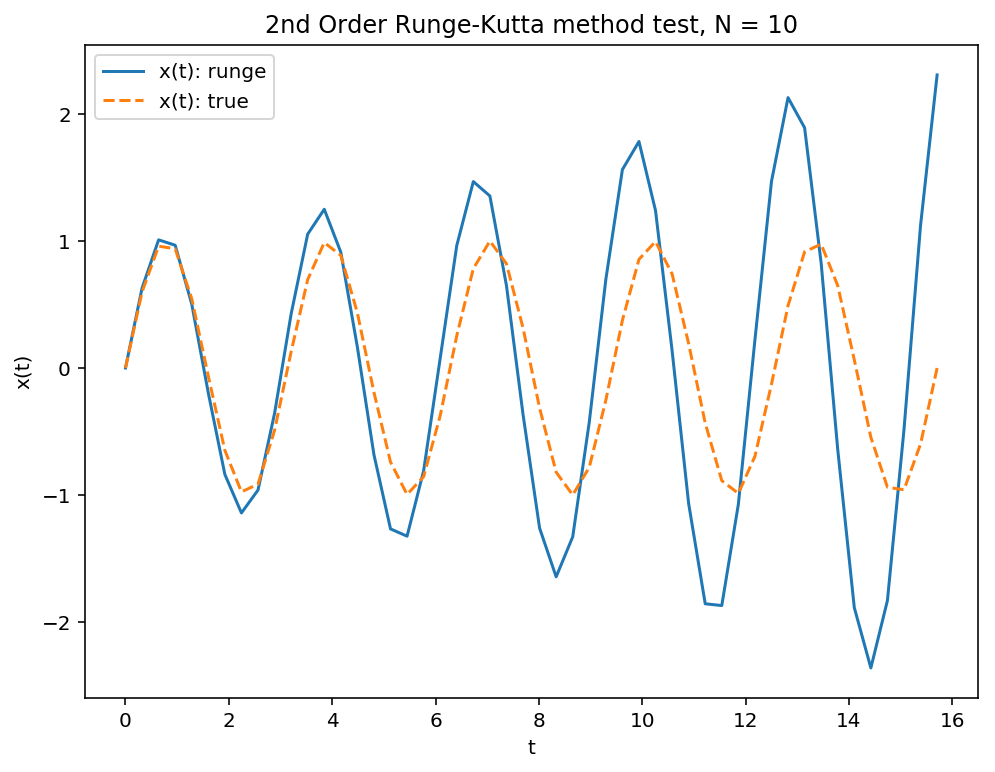

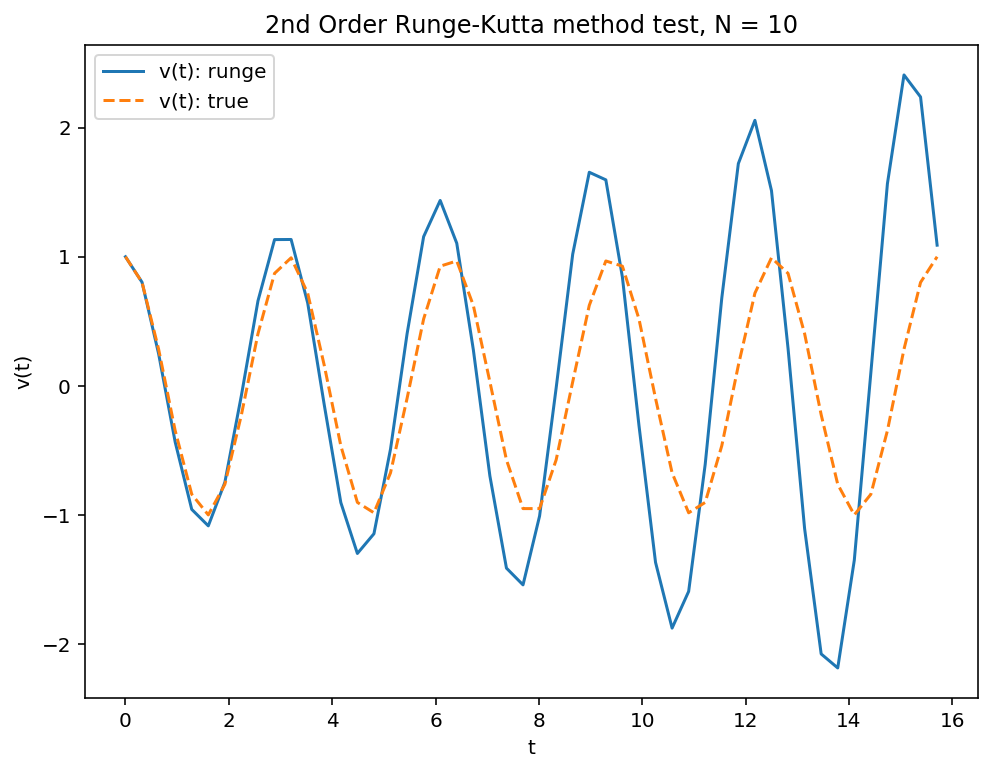

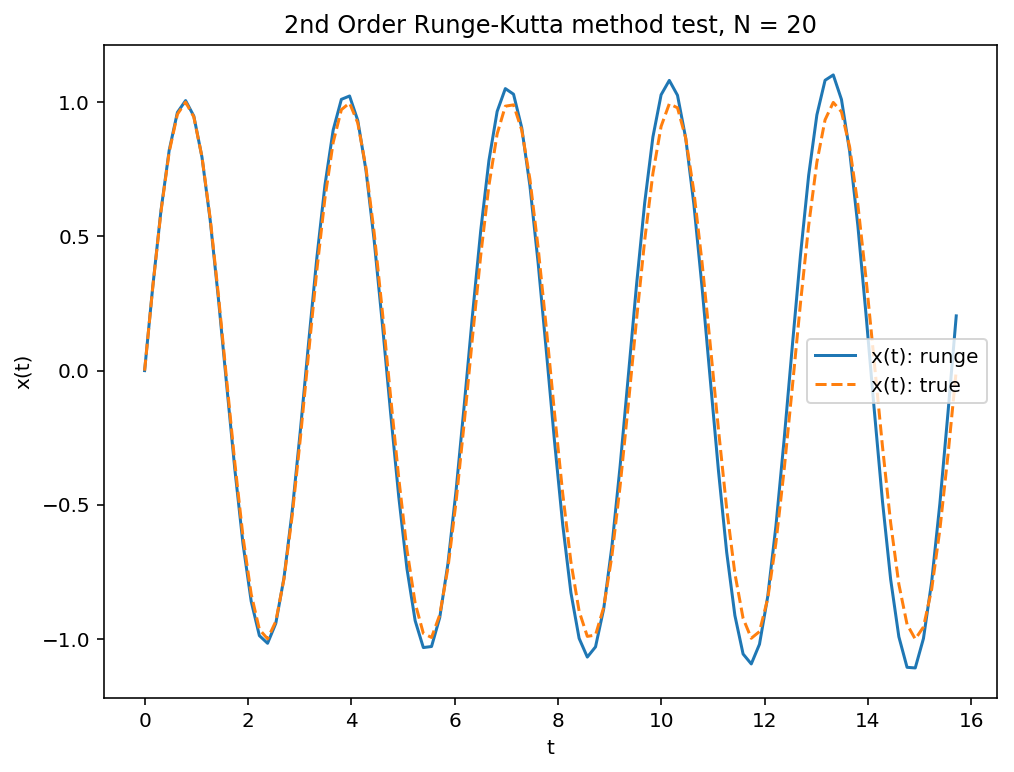

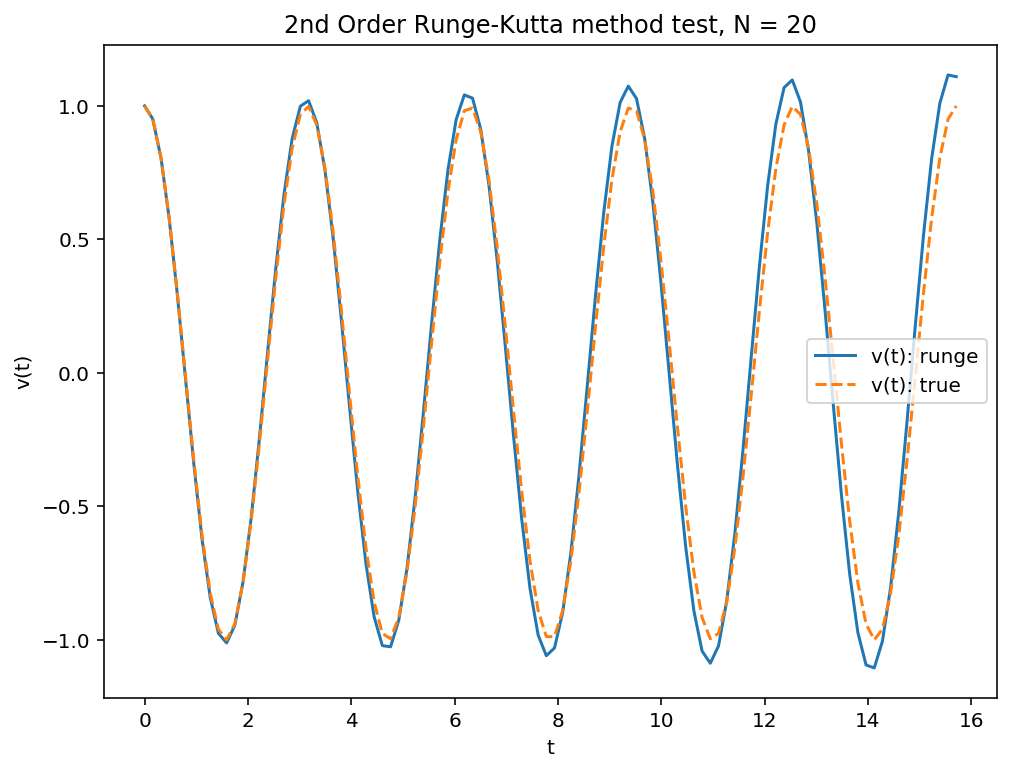

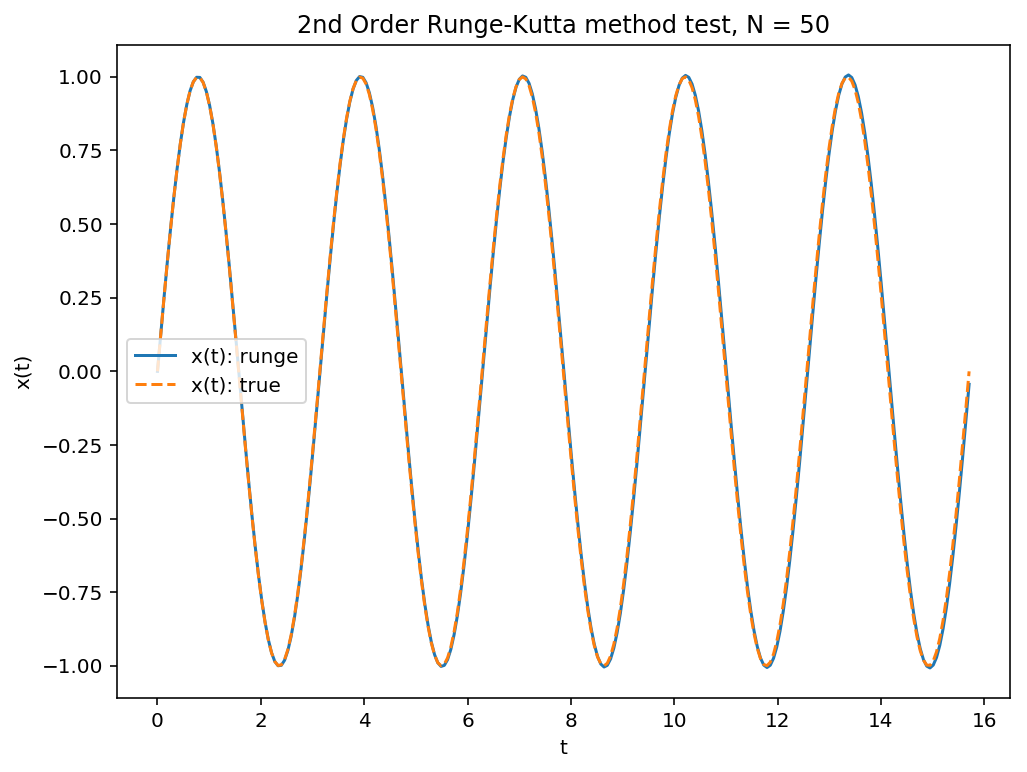

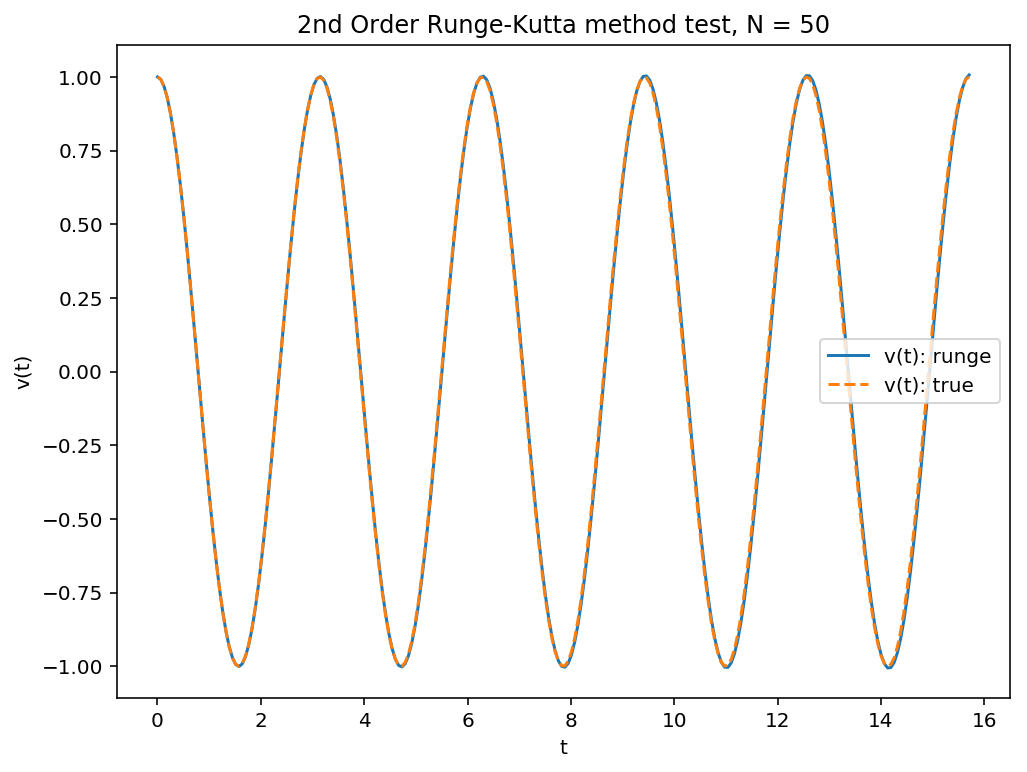

In [3]:
N = np.array([10, 20, 50]) # three different N-values

for n in N:
    t = np.linspace(0, 5*np.pi, 5*n, endpoint=True) # domain t

    r_runga = odes.runge_kutta_2ndOrd(np.array([0,1]), n) # r(t) using euler's method
    x_runga = np.array([i[0] for i in r_runga]) # retrieving each position from r(t)
    v_runga = np.array([i[1] for i in r_runga]) # retrieving each velocity from r(t)

    r_true = odes.gen_method(np.array([0,1]), n) # actual r(t)
    x_true = np.array([i[0] for i in r_true]) # retrieving actual x(t)
    v_true = np.array([i[1] for i in r_true]) # retrieving actual v(t)

    # title
    title = "2nd Order Runge-Kutta method test, N = "
    title += str(n)

    # legend labels
    xt_labels = np.array(["x(t): runge", "x(t): true"])
    vt_labels = np.array(["v(t): runge", "v(t): true"])

    odes.gen_plot(t, np.array([x_runga, x_true]), labels=xt_labels, linestyles=np.array(["-", "--"]), xlabel="t", ylabel="x(t)", title=title) # plotting x(t)'s
    odes.gen_plot(t, np.array([v_runga, v_true]), labels=vt_labels, linestyles=np.array(["-", "--"]), xlabel="t", ylabel="v(t)", title=title) # plotting v(t)'s

Compared to Euler's method, 2nd Order Runge-Kutta is far more accurate, especially at smaller $N$-values. However, compared to Heun's method, it look somewhat similar. This can be due to the fact that both methods are 2nd order, thus they should look similar.

## 4th Order Runge-Kutta Method

Let's now talk about 4th-order Runge-Kutta Method, which is accurate to 4th-order:

   $u_{k+1} = u_k + (K_1 + 2K_2 + 2K_3 + K_4)/6$,

   $K_1 = \Delta t\,f[t_k,u_k]$,

   $K_2 = \Delta t\, f[t_k + \Delta t/2, u_k + K_1/2]$,

   $K_3 = \Delta t\, f[t_k + \Delta t/2, u_k + K_2/2]$

   $K_4 = \Delta t\,f[t_k + \Delta t, u_k + K_3]$

   where $(K_1 + 2K_2 + 2K_3 + K_4)/6$ is our average slope.

So, if we can calculate these $K-values$, these slopes, at 4 different points, we can then approximate $u_k$ for each $t-value$.

We can now rewrite in terms of our vectors:
$$\vec{r}_{i+1}=\vec{r}_{i}+(K_{1}+2K_{2}+2K_{3}+K_{4})/6,$$
$$K_{1}=\Delta t\hat{J}\vec{r}_{i}$$
$$K_{2}=\Delta t\hat{J}(\vec{r}_{i}+K_{1}/2)$$
$$K_{3}=\Delta t\hat{J}(\vec{r}_{i}+K_{2}/2)$$
$$K_{4}=\Delta t\hat{J}(\vec{r}_{i}+K_{3})$$

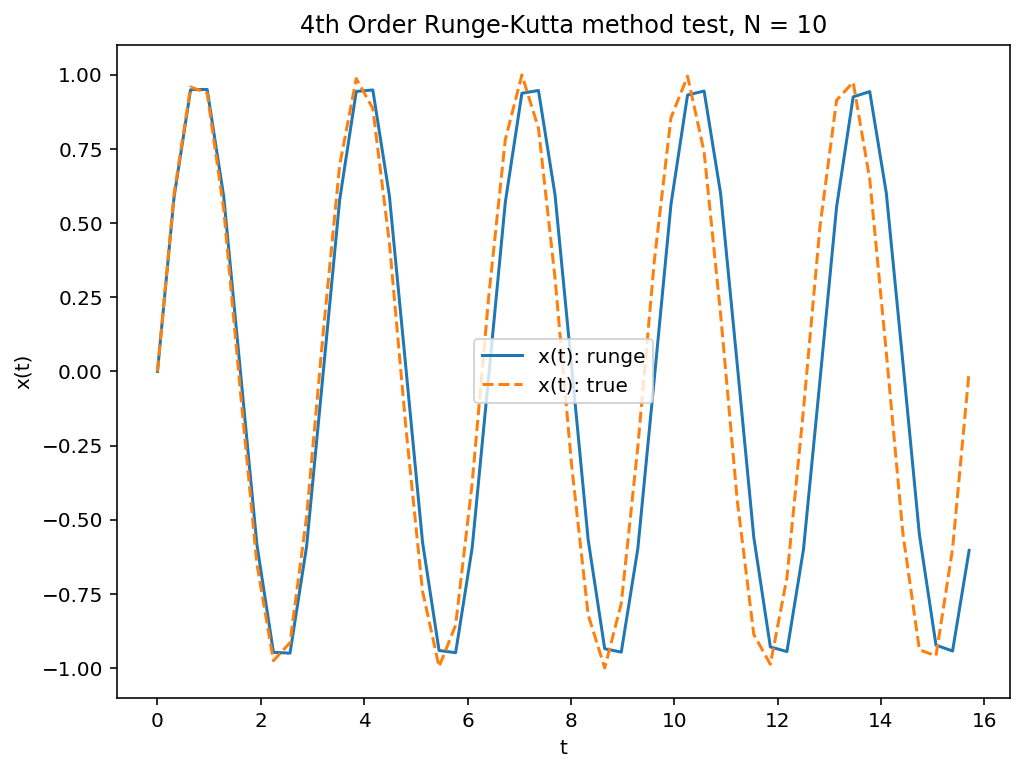

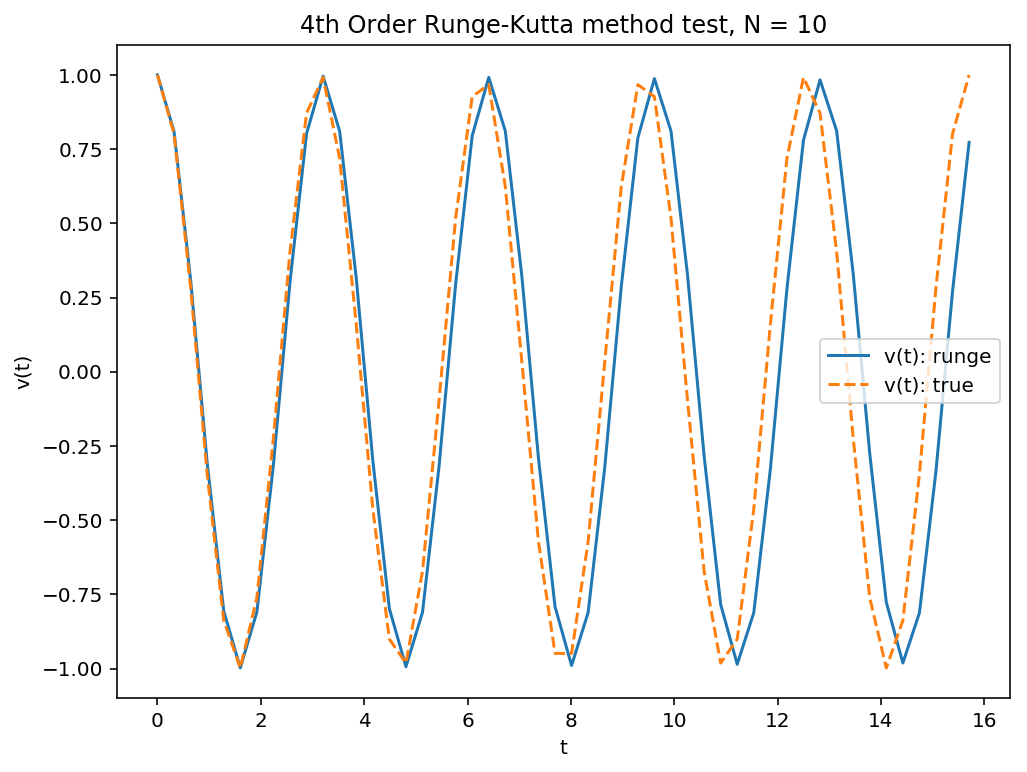

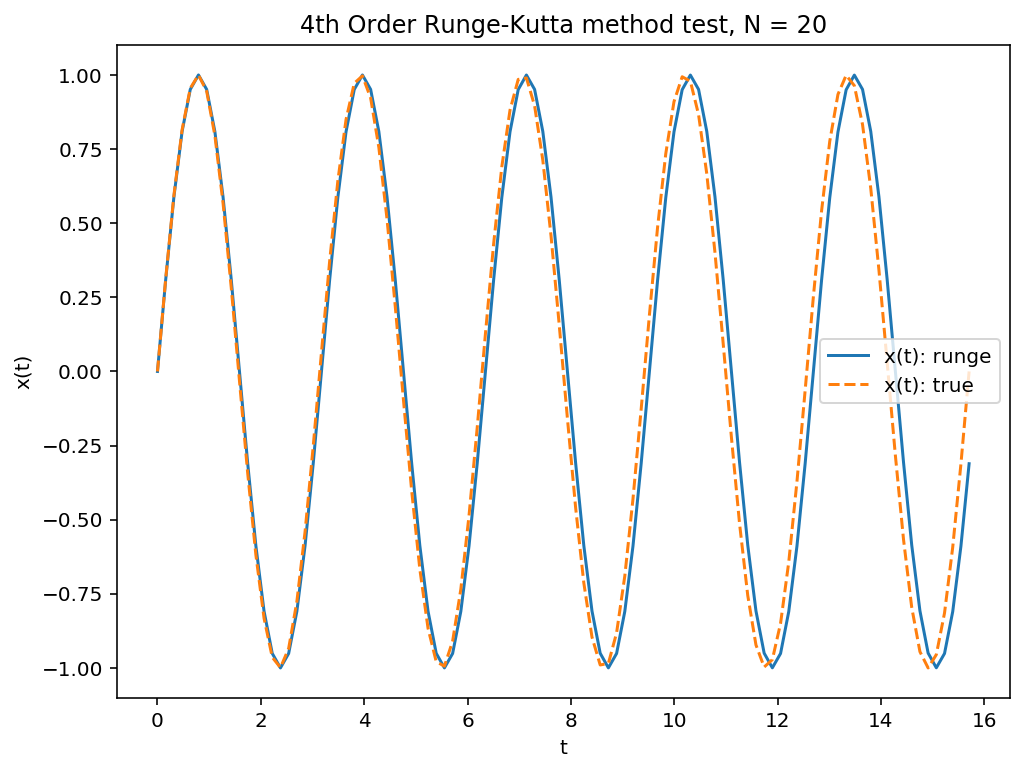

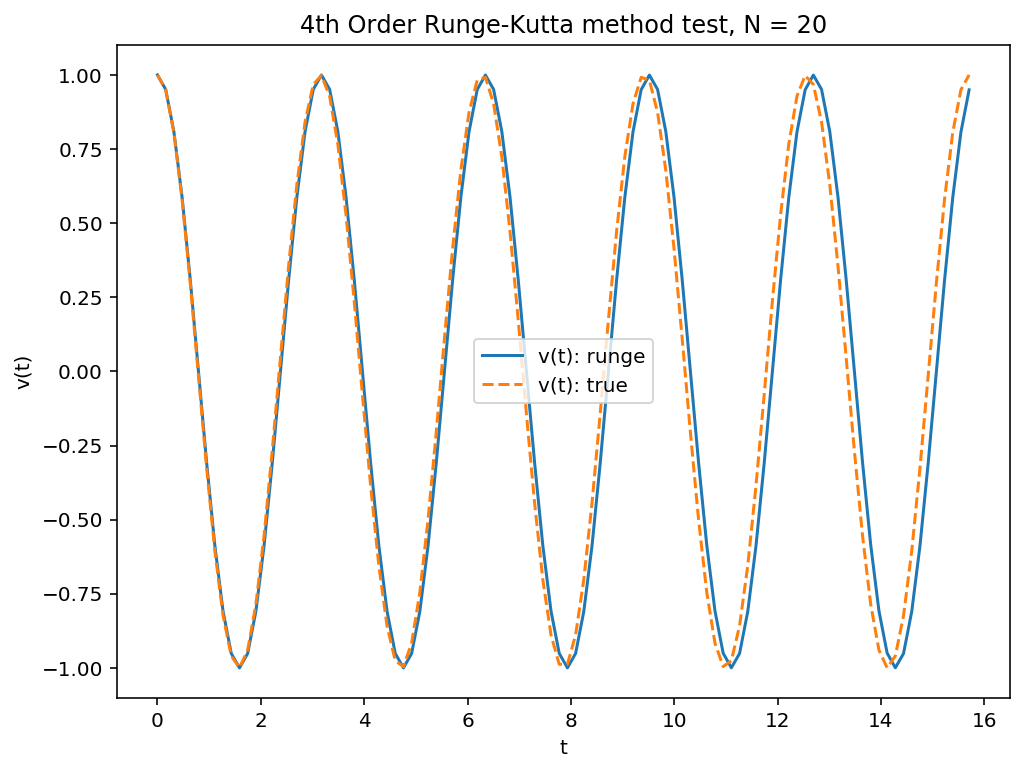

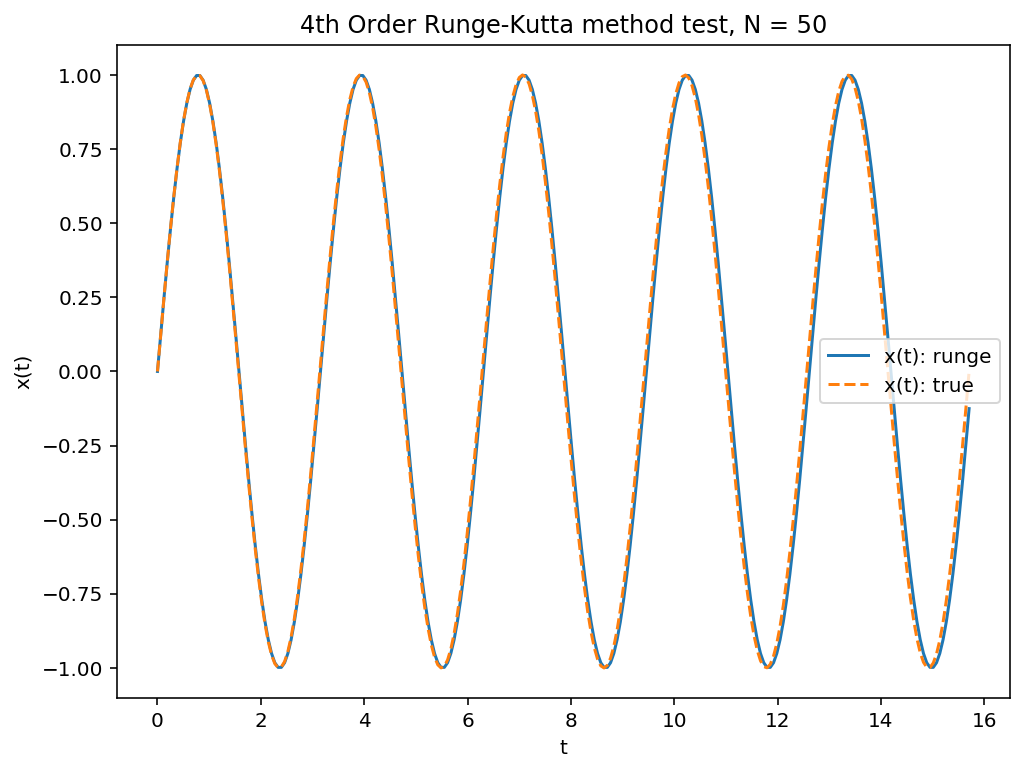

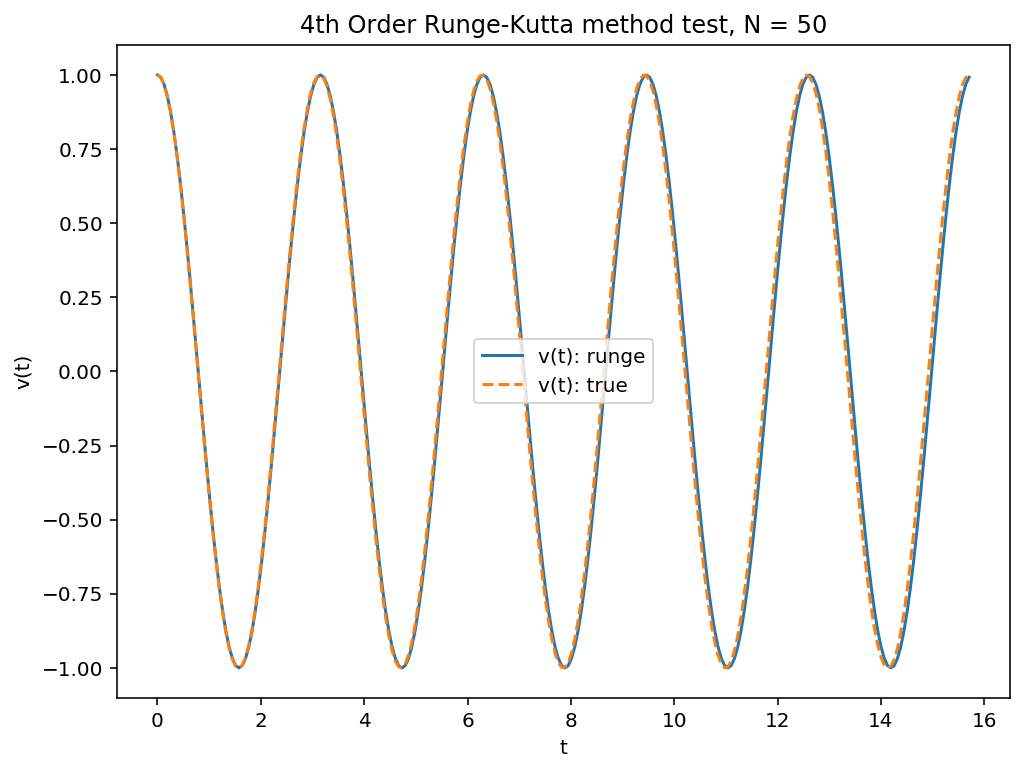

In [5]:
N = np.array([10, 20, 50]) # three different N-values

for n in N:
    t = np.linspace(0, 5*np.pi, 5*n, endpoint=True) # domain t

    r_runga = odes.runge_kutta_4thOrd(np.array([0,1]), n) # r(t) using euler's method
    x_runga = np.array([i[0] for i in r_runga]) # retrieving each position from r(t)
    v_runga = np.array([i[1] for i in r_runga]) # retrieving each velocity from r(t)

    r_true = odes.gen_method(np.array([0,1]), n) # actual r(t)
    x_true = np.array([i[0] for i in r_true]) # retrieving actual x(t)
    v_true = np.array([i[1] for i in r_true]) # retrieving actual v(t)

    # title
    title = "4th Order Runge-Kutta method test, N = "
    title += str(n)

    # legend labels
    xt_labels = np.array(["x(t): runge", "x(t): true"])
    vt_labels = np.array(["v(t): runge", "v(t): true"])

    odes.gen_plot(t, np.array([x_runga, x_true]), labels=xt_labels, linestyles=np.array(["-", "--"]), xlabel="t", ylabel="x(t)", title=title) # plotting x(t)'s
    odes.gen_plot(t, np.array([v_runga, v_true]), labels=vt_labels, linestyles=np.array(["-", "--"]), xlabel="t", ylabel="v(t)", title=title) # plotting v(t)'s

As we can see, compared to all previous methods, 4th Order Runge-Kutta, is the most accurate, especially at smaller $N$-values.